In [15]:
#!/usr/bin/python3

#import pypyodbc
#import urllib
import urllib.request as urllib
import requests
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#import mplfinance as mpf
#import matplotlib.dates as mpdates
Interval="15"

url="https://www.alphavantage.co/query?function=FX_INTRADAY&from_symbol=GBP&to_symbol=USD&interval="+Interval+"min&outputsize=full&apikey=QRNX49EZGZKYUACF&datatype=csv"
#response = requests.get(url)
url

'https://www.alphavantage.co/query?function=FX_INTRADAY&from_symbol=GBP&to_symbol=USD&interval=15min&outputsize=full&apikey=QRNX49EZGZKYUACF&datatype=csv'

In [2]:
from io import BytesIO

df = pd.read_csv(BytesIO(response.content))
df_for_graph=df

In [16]:
df=df.assign(Currency= "GBPUSD")
df=df.assign(TimeFrame= Interval+"Min")



In [4]:
df[['Date', 'Time']] = df['timestamp'].str.split(' ', expand=True)

In [17]:
df.head()

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time,TimeDeta,Day_Time_Index
0,2022-11-03 18:00:00,1.11804,1.11839,1.11726,1.11760,GBPUSD,15Min,2022-11-03,18:00:00,0 days 18:00:00,1080
1,2022-11-03 17:45:00,1.11816,1.11870,1.11775,1.11808,GBPUSD,15Min,2022-11-03,17:45:00,0 days 17:45:00,1065
2,2022-11-03 17:30:00,1.11810,1.11889,1.11756,1.11819,GBPUSD,15Min,2022-11-03,17:30:00,0 days 17:30:00,1050
3,2022-11-03 17:15:00,1.11835,1.11866,1.11739,1.11830,GBPUSD,15Min,2022-11-03,17:15:00,0 days 17:15:00,1035
4,2022-11-03 17:00:00,1.11704,1.11863,1.11671,1.11834,GBPUSD,15Min,2022-11-03,17:00:00,0 days 17:00:00,1020


In [6]:
df.shape[0]

968

In [7]:
df3=df
df3['TimeDeta'] = pd.to_timedelta(df3['Time'])
### Convert 'timeColumn' to minutes only.
df3['Day_Time_Index'] = df3['TimeDeta'].dt.total_seconds() / 60
df3['Day_Time_Index'] = df3['Day_Time_Index'].astype(int)
df3

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time,TimeDeta,Day_Time_Index
0,2022-11-03 18:00:00,1.11804,1.11839,1.11726,1.11760,GBPUSD,15Min,2022-11-03,18:00:00,0 days 18:00:00,1080
1,2022-11-03 17:45:00,1.11816,1.11870,1.11775,1.11808,GBPUSD,15Min,2022-11-03,17:45:00,0 days 17:45:00,1065
2,2022-11-03 17:30:00,1.11810,1.11889,1.11756,1.11819,GBPUSD,15Min,2022-11-03,17:30:00,0 days 17:30:00,1050
3,2022-11-03 17:15:00,1.11835,1.11866,1.11739,1.11830,GBPUSD,15Min,2022-11-03,17:15:00,0 days 17:15:00,1035
4,2022-11-03 17:00:00,1.11704,1.11863,1.11671,1.11834,GBPUSD,15Min,2022-11-03,17:00:00,0 days 17:00:00,1020
...,...,...,...,...,...,...,...,...,...,...,...
963,2022-10-20 16:45:00,1.12528,1.12586,1.12415,1.12538,GBPUSD,15Min,2022-10-20,16:45:00,0 days 16:45:00,1005
964,2022-10-20 16:30:00,1.12589,1.12647,1.12440,1.12529,GBPUSD,15Min,2022-10-20,16:30:00,0 days 16:30:00,990
965,2022-10-20 16:15:00,1.12854,1.12873,1.12532,1.12591,GBPUSD,15Min,2022-10-20,16:15:00,0 days 16:15:00,975
966,2022-10-20 16:00:00,1.12939,1.12977,1.12811,1.12856,GBPUSD,15Min,2022-10-20,16:00:00,0 days 16:00:00,960


In [8]:
df3.head(10)

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time,TimeDeta,Day_Time_Index
0,2022-11-03 18:00:00,1.11804,1.11839,1.11726,1.11760,GBPUSD,15Min,2022-11-03,18:00:00,0 days 18:00:00,1080
1,2022-11-03 17:45:00,1.11816,1.11870,1.11775,1.11808,GBPUSD,15Min,2022-11-03,17:45:00,0 days 17:45:00,1065
2,2022-11-03 17:30:00,1.11810,1.11889,1.11756,1.11819,GBPUSD,15Min,2022-11-03,17:30:00,0 days 17:30:00,1050
3,2022-11-03 17:15:00,1.11835,1.11866,1.11739,1.11830,GBPUSD,15Min,2022-11-03,17:15:00,0 days 17:15:00,1035
4,2022-11-03 17:00:00,1.11704,1.11863,1.11671,1.11834,GBPUSD,15Min,2022-11-03,17:00:00,0 days 17:00:00,1020
5,2022-11-03 16:45:00,1.11772,1.11843,1.11546,1.11704,GBPUSD,15Min,2022-11-03,16:45:00,0 days 16:45:00,1005
6,2022-11-03 16:30:00,1.11964,1.12027,1.11760,1.11773,GBPUSD,15Min,2022-11-03,16:30:00,0 days 16:30:00,990
7,2022-11-03 16:15:00,1.11815,1.12031,1.11747,1.11964,GBPUSD,15Min,2022-11-03,16:15:00,0 days 16:15:00,975
8,2022-11-03 16:00:00,1.12011,1.12017,1.11756,1.11815,GBPUSD,15Min,2022-11-03,16:00:00,0 days 16:00:00,960
9,2022-11-03 15:45:00,1.12072,1.12110,1.11907,1.12011,GBPUSD,15Min,2022-11-03,15:45:00,0 days 15:45:00,945


In [9]:
df3.shape[0]

968

In [10]:
filt= df3["Date"] == datetime.now().isoformat()[0:10]
df4=df3.loc[filt]

In [11]:
df4.shape[0]

73

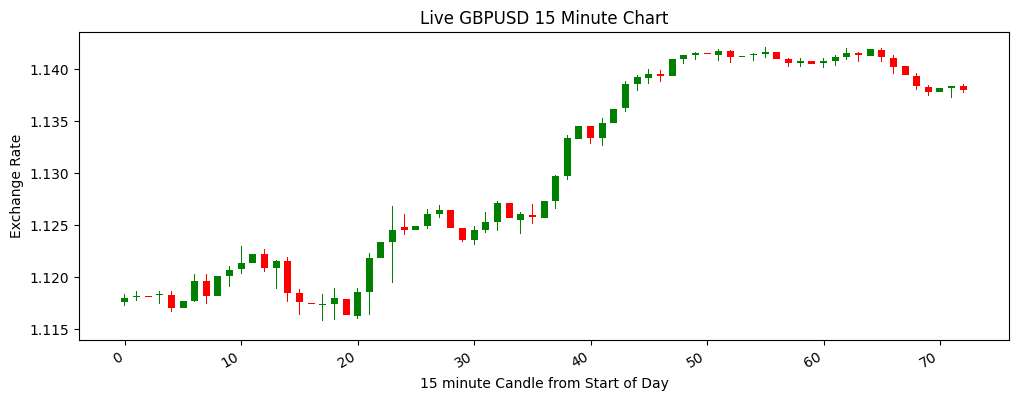

In [23]:
#plt.figure()
fig= plt.figure(figsize=(12,4))

up = df4[df4.close >= df4.open]
down = df4[df4.close < df4.open]

col1 = 'red'
col2 = 'green'

# Setting width of candlestick elements
#width = .3
#width2 = .03
width = .6
width2 = .06

# Plotting up prices of the stock
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

# Plotting down prices of the stock
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

# rotating the x-axis tick labels at 30degree
# towards right
#plt.xticks(np.arange(0, 24, step=4))
plt.xticks(rotation=30, ha='right')

# displaying candlestick chart of stock data
# of a week
plt.title("Live GBPUSD "+Interval+" Minute Chart")
plt.xlabel(Interval+' minute Candle from Start of Day')
plt.ylabel('Exchange Rate')

#plt.annotate("Start of Trading Session", xy=(745, 1.1405), xytext=(730, 1.15), arrowprops={"arrowstyle":"->", "color":"blue"})
#plt.annotate("News Event", xy=(795, 1.15), xytext=(780, 1.14), arrowprops={"arrowstyle":"->", "color":"blue"})
plt.plot()
plt.savefig('1min-2.png')
plt.show()